In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
# df = pd.read_csv("1429_1.csv")

In [140]:
df = pd.read_json("Movies_and_TV_5.json.gz", compression='gzip', lines=True)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3410019 entries, 0 to 3410018
Data columns (total 12 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   overall         int64 
 1   verified        bool  
 2   reviewTime      object
 3   reviewerID      object
 4   asin            object
 5   style           object
 6   reviewerName    object
 7   reviewText      object
 8   summary         object
 9   unixReviewTime  int64 
 10  vote            object
 11  image           object
dtypes: bool(1), int64(2), object(9)
memory usage: 289.4+ MB


In [144]:
df.head(2)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"11 9, 2012",A2M1CU2IRZG0K9,0005089549,{'Format:': ' VHS Tape'},Terri,So sorry I didn't purchase this years ago when...,Amazing!,1352419200,NaN,NaN
1,5,True,"12 30, 2011",AFTUJYISOFHY6,0005089549,{'Format:': ' VHS Tape'},Melissa D. Abercrombie,Believe me when I tell you that you will recei...,Great Gospel VHS of the Cathedrals!,1325203200,NaN,NaN


In [145]:
df.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image'],
      dtype='object')

In [146]:
df.isnull().sum()

overall                 0
verified                0
reviewTime              0
reviewerID              0
asin                    0
style              174207
reviewerName           82
reviewText           1581
summary               640
unixReviewTime          0
vote              2768010
image             3403048
dtype: int64

In [164]:
df['style'].value_counts()

TypeError: unhashable type: 'dict'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'dict'


{'Format:': ' DVD'}                                1645586
{'Format:': ' Amazon Video'}                       1027966
{'Format:': ' Blu-ray'}                             335181
{'Format:': ' Prime Video'}                         158950
{'Format:': ' VHS Tape'}                             61821
{'Format:': ' HD DVD'}                                1475
{'Format:': ' DVD-R'}                                 1428
{'Format:': ' Theatrical Release'}                     801
{'Format:': ' Audio CD'}                               657
{'Format:': ' DVD-ROM'}                                474
{'Format:': ' UMD for PSP'}                            352
{'Format:': ' Amazon Instant Video'}                   250
{'Format:': ' Electronics'}                            116
{'Format:': ' Hardcover'}                              107
{'Format:': ' Interactive DVD'}                         97
{'Format:': ' Paperback'}                               86
{'Format:': ' Laser Disc'}                              

In [70]:
df.drop(['reviews.didPurchase','reviews.id','reviews.userCity','reviews.userProvince','reviews.date','reviews.dateAdded'],axis=1,inplace=True)

In [73]:
df = df.dropna(subset=['asins','reviews.rating','reviews.text','reviews.title','reviews.username'])

In [74]:
df.isnull().sum()

id                        0
name                   6757
asins                     0
brand                     0
categories                0
keys                      0
manufacturer              0
reviews.dateSeen          0
reviews.doRecommend     557
reviews.numHelpful      491
reviews.rating            0
reviews.sourceURLs        0
reviews.text              0
reviews.title             0
reviews.username          0
dtype: int64

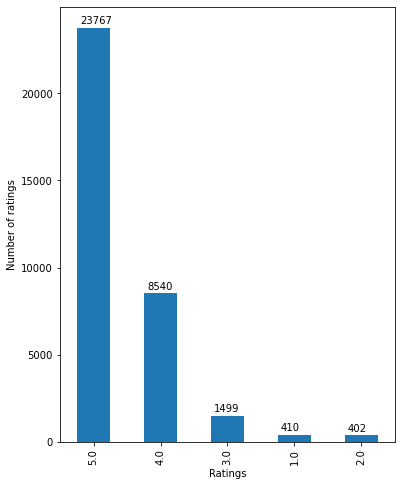

In [109]:
plt.figure(figsize=(6,8))
rating = df['reviews.rating'].value_counts()
ax = rating.plot(kind='bar')
for i,v in enumerate(rating):
    ax.text(i-0.2, v+200, str(v))
plt.xlabel('Ratings')
plt.ylabel('Number of ratings')
plt.show()

Text(0, 0.5, 'Number of counts')

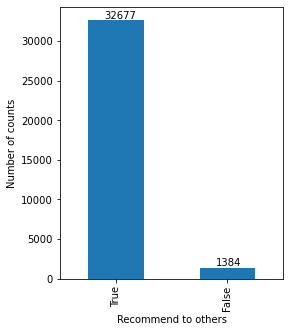

In [126]:
plt.figure(figsize=(4,5))
rec = df['reviews.doRecommend'].value_counts()
ax = rec.plot(kind='bar')
for i,v in enumerate(rec):
    ax.text(i-0.1, v+200, str(v))
plt.xlabel('Recommend to others')
plt.ylabel('Number of counts')

In [132]:
df = df.rename(columns={'id' : 'product_id'})

In [133]:
df['product_id'].nunique() # 38 unique products

38

In [134]:
 df['product_id'].value_counts() # most popular product with almost 11k reviews

AVphgVaX1cnluZ0-DR74    10965
AVpfl8cLLJeJML43AE3S     6617
AV1YE_muvKc47QAVgpwE     5056
AV1YnRtnglJLPUi8IJmV     3176
AVqkIhwDv8e3D1O-lebb     2814
AVqVGWLKnnc1JgDc3jF1     1685
AVpjEN4jLJeJML43rpUe     1038
AVpfpK8KLJeJML43BCuD      636
AVphPmHuilAPnD_x3E5h      580
AVsRjfwAU2_QcyX9PHqe      400
AV1YnR7wglJLPUi8IJmi      372
AVqVGWQDv8e3D1O-ldFr      270
AVpidLjVilAPnD_xEVpI      255
AVqVGZNvQMlgsOJE6eUY      212
AVqkIiKWnnc1JgDc3khH      158
AVpfIfGA1cnluZ0-emyp       73
AVqVGZO3nnc1JgDc3jGK       67
AVpftoij1cnluZ0-p5n2       51
AVqkIdntQMlgsOJE6fuB       30
AVzRlorb-jtxr-f3ygvQ       16
AVpf_4sUilAPnD_xlwYV       15
AVpe7AsMilAPnD_xQ78G       15
AVqkIj9snnc1JgDc3khU       14
AVpfiBlyLJeJML43-4Tp       13
AVphLY7v1cnluZ0-_Ty0       13
AVpf_znpilAPnD_xlvAF       10
AVpgdkC8ilAPnD_xsvyi       10
AVzvXXwEvKc47QAVfRhx        8
AVpggqsrLJeJML43O5zp        8
AVqkIhxunnc1JgDc3kg_        7
AVqVGZN9QMlgsOJE6eUZ        6
AVzoGHhAglJLPUi8GfzY        6
AVph0EeEilAPnD_x9myq        6
AVpg3q4RLJ

In [30]:
df2 = df[['reviews.text','reviews.rating']]

In [31]:
df2.head()

,reviews.text,reviews.rating
0,This product so far has not disappointed. My c...,5.0
1,great for beginner or experienced person. Boug...,5.0
2,Inexpensive tablet for him to use and learn on...,5.0
3,I've had my Fire HD 8 two weeks now and I love...,4.0
4,I bought this for my grand daughter when she c...,5.0


In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.text    34659 non-null  object 
 1   reviews.rating  34627 non-null  float64
dtypes: float64(1), object(1)
memory usage: 541.7+ KB


In [35]:
df2['reviews.text'][0]

'This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.'